# Smart Underwriter!

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.display.max_columns = 999
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

## Underwrting:

>In insurance, underwriting is to sign and accept liability and guaranteeing payment in case loss or damage occurs.
> Underwriting is provided by a large financial service provider such as a bank, insurer or investment house. 
From [Wikipedia](https://en.wikipedia.org/wiki/Underwriting)

### Drawbacks
* It was mainly done by human before. 
* Subjective, concerns of equality.

### Need for computer aid underwriting
* Objective
* Non bias (regulatory requirement!)
* Fast

### There are products outside already:
* [Desktop Underwriter](https://www.fanniemae.com/singlefamily/desktop-underwriter) From Fannie
* [Loan Prospector](http://www.loanprospector.com/learn/) From Freddie

## Goal:

**Develop a prediction model to predict the risk of the morgage**

## Data:
Fannie Mae Single Family House Morgage data (2000 - 2014)




In [2]:
# Read the data inside:
loan2011 = pd.read_csv('merged_summary_2011.csv')
loan2010 = pd.read_csv('merged_summary_2010.csv')

In [3]:
loan2012 = pd.read_csv('merged_summary_2012.csv')

### Let's take a peek at the data.

In [4]:
loan2011.head()

,Unnamed: 0,Unnamed: 0.1,Zero.Bal.Code,LOAN_ID,Monthly.Rpt.Prd,Servicer.Name,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Maturity.Date,MSA,Delq.Status,MOD_FLAG,ZB_DTE,LPI_DTE,FCC_DTE,DISP_DT,FCC_COST,PP_COST,AR_COST,IE_COST,TAX_COST,NS_PROCS,CE_PROCS,RMW_PROCS,O_PROCS,NON_INT_UPB,PRIN_FORG_UPB,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,PURPOSE,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,CSCORE_C
0,0,0,0.0,100000064140,09/01/2015,"WELLS FARGO BANK, N.A.",4.250,176517.57,46,314,291.0,11/2041,12700.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,OTHER,4.250,198000,360,10/2011,12/2011,80.0,80.0,1.0,38.0,731.0,N,P,SF,1,P,MA,25,NaN,FRM,NaN
1,1,1,0.0,100002199911,09/01/2015,OTHER,4.250,156729.96,45,315,315.0,12/2041,24340.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,OTHER,4.250,168000,360,11/2011,01/2012,80.0,80.0,2.0,46.0,803.0,N,P,SF,1,P,MI,494,NaN,FRM,806.0
2,2,2,0.0,100006023337,09/01/2015,"WELLS FARGO BANK, N.A.",4.125,148806.71,46,314,298.0,11/2041,31080.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,"WELLS FARGO BANK, N.A.",4.125,165000,360,10/2011,12/2011,43.0,43.0,1.0,41.0,811.0,N,P,SF,1,P,CA,906,NaN,FRM,NaN
3,3,3,0.0,100007287066,09/01/2015,"WELLS FARGO BANK, N.A.",4.000,230793.22,46,314,311.0,11/2041,35620.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,"WELLS FARGO BANK, N.A.",4.000,250000,360,11/2011,12/2011,70.0,70.0,2.0,15.0,791.0,N,P,SF,1,P,NY,125,NaN,FRM,770.0
4,4,4,1.0,100008919570,01/01/2013,NaN,4.125,234979.98,13,347,0.0,12/2041,41740.0,999.0,N,01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,OTHER,4.125,239000,360,11/2011,01/2012,42.0,42.0,2.0,21.0,796.0,N,R,SF,1,P,CA,921,NaN,FRM,798.0


In [5]:
loan2011['Monthly.Rpt.Prd'] = pd.to_datetime(loan2011['Monthly.Rpt.Prd'], format = '%m/%d/%Y')
loan2011['ORIG_DTE'] = pd.to_datetime(loan2011['ORIG_DTE'], format = '%m/%Y')

In [6]:
loan = {'2011':loan2011, '2012': loan2012, '2010': loan2010}

In [7]:
years = []
prepaid = {}
default = {}
loan_num = {}

for key in loan.keys():
    temp_size =len(loan[key])
    temp_count = loan[key].groupby('Zero.Bal.Code')['LOAN_ID'].count()
    loan_num[key] = temp_size
    prepaid[key] = temp_count[1]/temp_size
    default[key] = 1 - sum(temp_count[0:2])/temp_size


### How many morgages have been prepaid in these three years?

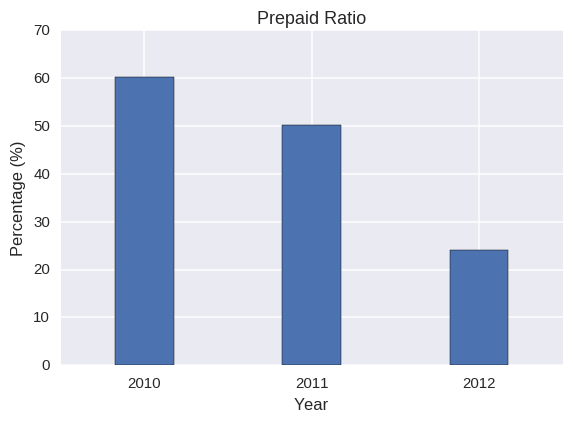

In [26]:
def plot_dict_bar(val_dict):
    x_axis = sorted(list(val_dict.keys()))
    y_axis = [val_dict[key] for key in x_axis]
    x = np.arange(3) - 0.175
    y = np.array(y_axis)*100
    fig, ax  = plt.subplots()
    ax.bar(x,y,0.35)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(x_axis)
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Prepaid Ratio")
    plt.show()
    
plot_dict_bar(prepaid)

Remember prepay includes a common case that if you want to switch to another house. You will sell the current house that you live in. That would count as prepay too.

### Default Rate?

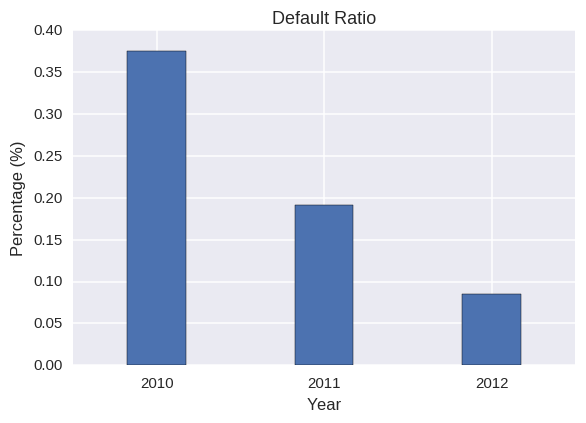

In [27]:
def plot_dict_bar(val_dict):
    x_axis = sorted(list(val_dict.keys()))
    y_axis = [val_dict[key] for key in x_axis]
    x = np.arange(3) - 0.175
    y = np.array(y_axis)*100
    fig, ax  = plt.subplots()
    ax.bar(x,y,0.35)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(x_axis)
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Default Ratio")
    plt.show()
    
plot_dict_bar(default)

Default rate is not very high in these three years. The general trend is going down, which make senses because the economy is getting better.

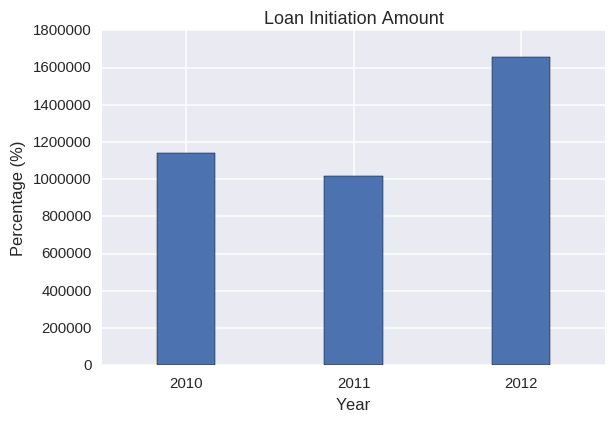

In [28]:
def plot_dict_bar(val_dict):
    x_axis = sorted(list(val_dict.keys()))
    y_axis = [val_dict[key] for key in x_axis]
    x = np.arange(3) - 0.175
    y = np.array(y_axis)
    fig, ax  = plt.subplots()
    ax.bar(x,y,0.35)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(x_axis)
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Loan Initiation Amount")
    plt.show()
    
plot_dict_bar(loan_num)

In [21]:
years = []
loan_to_value = {}

for key in loan.keys():
    temp_ltv = {}
    temp_mean = loan[key].groupby('Zero.Bal.Code')['OLTV'].mean()
    temp_ltv['Current'] = temp_mean[0]
    temp_ltv['Prepaid'] = temp_mean[1]
    temp_ltv['Default'] = np.mean(temp_mean[2:])
    loan_to_value[key] = temp_ltv

result = pd.DataFrame.from_dict(loan_to_value)
result.head()

,2010,2011,2012
Current,70.566647,72.283644,72.187003
Default,76.293522,78.081337,79.990217
Prepaid,69.068000,71.193115,71.320689


It is very interesting to find out that "default" loans tends to have slightly higher loan-to-value (LTV) ratio on average, meaning they tends to have lower downpayment.

In [24]:
years = []
credit_score = {}

for key in loan.keys():
    temp_cscore = {}
    temp_mean = loan[key].groupby('Zero.Bal.Code')['CSCORE_C'].mean()
    temp_cscore['Current'] = temp_mean[0]
    temp_cscore['Prepaid'] = temp_mean[1]
    temp_cscore['Default'] = np.mean(temp_mean[2:])
    credit_score[key] = temp_cscore

result2 = pd.DataFrame.from_dict(credit_score)
result2.head()

,2010,2011,2012
Current,768.713316,769.869627,773.537852
Default,746.017833,741.696262,739.085949
Prepaid,774.482145,774.883571,773.881226


Again, it is very interesting to find that default loans tend to have slightly lower credit score, on average.

In [16]:
# Last one, default by states...
years = []
state_res = {}

for key in loan.keys():
    temp_state_count = loan[key][(loan[key]['Zero.Bal.Code'] == 3) | (loan[key]['Zero.Bal.Code'] == 6) | (loan[key]['Zero.Bal.Code'] == 9)].groupby('STATE')['LOAN_ID'].count()
    states = list(temp_state_count.index)
    for state in states:
        if state_res.get(state) == None:
            state_res[state] = temp_state_count[state]
        else:
            state_res[state] = state_res[state] + temp_state_count[state]
    

total_state_res = pd.DataFrame.from_dict(state_res, orient='index')
total_state_res.columns=['Default']

In [14]:
total_state_res.sort_values(by='Default', ascending=False)


,Default
CA,599
IL,534
TX,330
WI,313
MO,300
OH,296
WA,288
NY,287
NC,281
TN,268


Big states tend to have more default cases. The better way of doing it maybe take the default ratio.

## Next plan:

* Process all data and get a big picture from the whole dataset
* Start to work on the prediction model